## Continous time Quantum Monte Carlo of a single spin

The Hamiltonian of a single spin in a magnetic field is
$$
H = -\frac{h}{2} \sigma_z - \frac{\Gamma}{2} \sigma_x.
$$

### Exercise 1.1: Map to 1D Ising chain
We start from the partition function of the quantum spin at inverse temperature $\beta$ (see Eq. (7.18) of the lecture notes):
$$
Z = \text{Tr}e^{-\beta \hat{H}} = \text{Tr}\left(e^{-\Delta \tau \hat{H}}\right)^M \approx
\text{Tr}\left(\mathbb{1} - \Delta \tau \hat{H}\right)^M = \text{Tr} (\hat{U}^M),
$$
with the transfer matrix
$$
\hat{U} = \begin{bmatrix}
    1 + \frac{\Delta \tau h}{2}       & \frac{\Delta \tau \Gamma}{2} \\
    \frac{\Delta \tau \Gamma}{2}      & 1 - \frac{\Delta \tau h}{2}
\end{bmatrix}.
$$

Now consider a 1D Ising chain of $M$ spins at inverse temperature $\beta_{cl}$ with Hamiltonian
$$
H_{cl} = -J_{cl} \sum_{i=1}^M \sigma_i \sigma_{i+1} - h_{cl} \sum_{i=1}^M \sigma_i + E_0.
$$
Its partition function is
$$
Z_{cl} = \sum_{\sigma_1,\dots,\sigma_M} e^{-\beta_{cl} H_{cl}(\sigma_1, \dots,\sigma_M)}
= \sum_{\sigma_1,\dots,\sigma_M} e^{\beta_{cl} h_{cl} \sigma_1}e^{\beta_{cl} J_{cl} \sigma_1 \sigma_2}
e^{\beta_{cl} h_{cl} \sigma_2} \dots e^{\beta_{cl} h_{cl} \sigma_M} e^{\beta_{cl} J_{cl} \sigma_M \sigma_1}e^{-\beta_{cl} E_0} = \sum_{\sigma_1,\dots,\sigma_M} V_{\sigma_1, \sigma_2} V_{\sigma_2, \sigma_3} \dots V_{\sigma_M, \sigma_1},
$$
which we can see as a trace over a product of $M$ transfer matrices $V$ with entries $V_{\sigma, \sigma'}$. A convenient choice of the transfer matrix is
$$
V_{\sigma, \sigma'} = e^{\beta_{cl} h_{cl} \sigma/2}e^{\beta_{cl} J_{cl} \sigma \sigma'}
e^{\beta_{cl} h_{cl} \sigma'/2}  e^{-\beta_{cl} E_0/M},
$$
or in matrix form
$$
V = \begin{bmatrix}
    e^{\beta_{cl} \left(h_{cl} + J_{cl} -\frac{E_0}{M}\right)}     & e^{-\beta_{cl} \left(J_{cl} +\frac{E_0}{M}\right)} \\
    e^{-\beta_{cl} \left(J_{cl} +\frac{E_0}{M}\right)}      & e^{\beta_{cl} \left(-h_{cl} + J_{cl} -\frac{E_0}{M}\right)}
\end{bmatrix}.
$$
With this, the partition function of the 1D Ising chain can be written as
$$
Z_{cl} = \text{Tr} V^M.
$$
Comparing to the quantum  partition function $Z = \text{Tr} \hat{U} ^M$ we see that we get the mapping if the matrices $\hat{U}$ and $V$ are equal. Element-wise comparison gives the Eqs. (7.27-7.29) from the lecture notes (in the assumption $\log (1 + \Delta \tau h/2)\approx \Delta \tau /2$):
$$
\beta_{cl} J_{cl} = -\frac{1}{2}\log(\Delta \tau \Gamma /2), \\
\beta_{cl} h_{cl} = \log (1 + \Delta \tau h/2) \approx \Delta \tau h/2, \\
\beta_{cl} E_0 = M \beta_{cl} J_{cl}.
$$

### Monte Carlo Implementation
The analytical solution for the magnetization $\langle \sigma_x \rangle= \frac{2}{\beta}\partial_\Gamma \log Z$ is
$$
\langle \sigma_x \rangle = \frac{\Gamma}{\sqrt{\Gamma^2+h^2}} \tanh\left( \frac{\beta}{2} \sqrt{h^2+\Gamma^2} \right).
$$
We map the quantum system to a classical continous 1D spin chain of length $\beta$. To compute the total energy in the continuum limit, we start by equating
$$
\beta E = -J_{cl}\beta_{cl}\sum_i s_is_{i+1} - \beta_{cl}h_{cl}\sum_is_i +\beta_{cl}J_{cl}M.
$$
Considering only the term $$- \beta_{cl}h_{cl}\sum_is_i $$ we multiply and divide by $\Delta\tau,$ i.e. we consider
$$
- \beta_{cl}\frac{h_{cl}}{\Delta\tau}\sum_i\Delta\tau s_i.
$$
Using $\beta_{cl}h_{cl}=\Delta\tau\frac{h}{2}$ and taking the continuum limit, i.e. $\sum_i\Delta\tau s_i \rightarrow \int_0^{\beta}d\tau s(\tau)$, the first contribution $\beta E_1 = - \beta_{cl}h_{cl}\sum_is_i $ to the total energy can be obtained via
$$
\beta E_1=-\Delta\tau\frac{h}{2\Delta\tau}\int_0^{\beta}d\tau s(\tau) \rightarrow E_1=-\frac{h}{2\beta}\int_0^{\beta}d\tau s(\tau).
$$
For the second contribution to $E$ we notice that the terms in the sum $\sum_{i=1}^M s_i s_{i+1}$ are either equal to $1$ if the neighbouring spins are aligned, or $-1$ if they are not aligned. This allows us to write
$$
\beta E_2=-J_{cl}\beta_{cl}\sum_i^M s_is_{i+1} +\beta_{cl}J_{cl}M =-J_{cl}\beta_{cl}\left(\left(\sum_i^M 1\right)-2(\mathrm{number\ of\ domain\ walls})\right)+\beta_{cl}J_{cl}M=2J_{cl}\beta_{cl}(\mathrm{number\ of\ domain\ walls}).
$$
Since the number of domain walls needs to be even due to the periodic boundary conditions, we write it as $2n$, giving
$$
\beta E_2=2\beta_{cl}J_{cl}2n=-\frac{1}{2}\log(\Delta\tau\frac{\Gamma}{2})4n\rightarrow E_2=\frac{-2n}{\beta}\log(\Delta\tau\frac{\Gamma}{2}),
$$
such that in the continuum limit (replacing $\Delta\tau$ with $d\tau$ in the last expression), the total energy of the system $E_\mathrm{tot}=E_1+E_2$ is

$$
E_\mathrm{tot} = -\frac{h}{2} S_z^\mathrm{tot}- \frac{2n}{\beta}\log \left(\frac{d\tau \Gamma}{2}\right),
$$


where $2n$ is the number of domain walls and $\sigma(\tau)$ is the magnetization, and $S_z^\mathrm{tot}=\frac{1}{\beta}\int_0^\beta d\tau \sigma(\tau)$ the total magnetization. From the above result we can calculate the acceptance probabilities
$$
A(X \rightarrow Y) = \min\left( 1, \frac{V_Y T(Y\rightarrow X)}{V_X T(X\rightarrow Y)} \right).
$$
For adding two domain walls we get
$$
\frac{V_Y}{V_X} = \exp({-\beta \Delta E}) = \left(\frac{d\tau\Gamma}{2}\right)^2 \exp({\frac{\beta h}{2} \mathop{\Delta S_z^\mathrm{tot}}}),
$$
with the transition probability from $Y(2n+2) \rightarrow X(2n)$ given by the probability of removing two domain walls, selected subsequently out of the $2n+2$ available transitions
$$
\ T(Y\rightarrow X)=\frac{1}{\left(2n+1\right) \left(2n+2\right)},
$$
and $T(X\rightarrow Y)$ given by the probability of picking two imaginary time locations $\tau_1, \ \tau_2$,
$$
T(X\rightarrow Y)=\left(\frac{\mathop{d\tau}}{\beta}\right)^2.
$$
Therefore, the acceptance probability for adding two domain walls is
$$
A(X(2n) \rightarrow Y(2n+2)) = \min\left( 1, \frac{\exp(\beta h \mathop{\Delta S_z^\mathrm{tot}/2}) \left(\frac{\Gamma \beta}{2}\right)^2}{(2n+1)(2n+2)} \right) ,
$$
and for removing two domain walls it is
$$
A(X(2n) \rightarrow Y(2n-2)) = \min\left( 1, \frac{\exp(\beta h \mathop{\Delta S_z^\mathrm{tot}/2})2n(2n-1)}{ \left(\frac{\Gamma \beta}{2}\right)^2} \right).
$$
The average magnetization depends on the number of domain walls $2n$:
$$
\langle \sigma^x \rangle = \frac{2 \langle 2n \rangle}{\beta \Gamma}.
$$
This formula can be derived starting from $\langle \sigma^x\rangle = \frac{2}{\beta}\partial_\Gamma \log Z$ and writing the parition function in terms of configurations, $Z = \sum_C e^{-\beta E[C]}$, with $E[C]=-\frac{h}{2} S_z^\mathrm{tot}- \frac{2n}{\beta}\log \left(\frac{d\tau \Gamma}{2}\right)$ as above.

In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import copy
from sys import stdout
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 9

#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=False)

### Analytical solution

In [2]:
sx = lambda gamma,h,beta: gamma/np.sqrt(gamma**2+h**2)*np.tanh(beta*np.sqrt(h**2+gamma**2)/2)

### Worldline class for simulation

In [ ]:
class Worldline:

    def __init__(self,beta,gamma,h=0):
        self.beta  = beta     # inverse temperature \beta
        self.gamma = gamma    # transverse field \Gamma
        self.h     = h        # magnetic field h
        self.s0    = 1        # spin at \tau=0 (whether the first spin is up or down)
        self.kinks = []       # position of kinks (domain walls), sorted from 0 to beta
        self.magnobs = []     # observations (measurements) of the magnetization

    def sz(self, kinks, s0):
        # Compute the magnetization of a given configuration (i.e. given first spin and domain walls)
        # the magnetization is given by S^z = 1/\beta \int_0^\beta d\tau \sigma(\tau)
        if len(kinks)>0:
            sz = s0 * (kinks[0] + (self.beta - kinks[-1])) # the region wher the kink can be found start ----|............|---end
            for i in range(len(kinks)-1):
                sz += s0*(-1)**(i+1)*(kinks[i+1]-kinks[i]) # distance of the kinks increses/decreases the magnetization
            sz /= self.beta
        else:
            # no domain wall
            sz = s0
        return sz

    def szdifference_add(self, ta, tb):
        """
        Compute the difference in magnetization when adding two domain walls at imaginary times ta and tb.
        Because of periodic boundary conditions, they have to be added in pairs.

        Params
        ------
        ta : float, 0 <= ta <= self.beta
            Imaginary time of first new kink.
        tb : float, 0 <= tb <= self.beta
            Imaginary time of second new kink.

        """
        # take care of spin s0
        if ta > tb:
            # s0 lies in between the new domain walls, so we have to flip it
            new_s0 = -1*self.s0
        else:
            # s0 lies outside the domain walls, so it remains the same
            new_s0 = self.s0

        # insert the two domain walls
        new_kinks = copy.copy(self.kinks)
        new_kinks += (ta, tb)
        new_kinks.sort()

        # compute difference in total magnetization
        return self.sz(new_kinks, new_s0) - self.sz(self.kinks, self.s0)

    def szdifference_rem(self, i, j):
        """
        Compute the difference in magnetization when removing the two domain walls i and j.
        Because of periodic boundary conditions, they have to be removed in pairs.

        Params
        ------
        i : int, 0 <= i < len(self.kinks)
            Imaginary time of first kink to remove.
        j : int, 0 <= j < self.kinks
            Imaginary time of second kink to remove.

        """
        new_kinks = copy.copy(self.kinks)
        # remove domain walls and take care of initial spin
        if i > j:
            del new_kinks[i]
            del new_kinks[j]
            new_s0 = -1*self.s0
        else:
            del new_kinks[j]
            del new_kinks[i]
            new_s0 = self.s0

        # Compute difference in Sz
        return self.sz(new_kinks, new_s0) - self.sz(self.kinks, self.s0)

    def insertUpdate(self):
        """
        Do an update that inserts two domain walls if accepted.

        Procedure:
        1. propose two new domain walls in [0, self.beta].
        2. compute acceptance probability A(X(n) -> Y(n+2))
        3. if proposition is accepted, add the new kinks and take care of initial spin

        """
        # 1. propose to add kinks at times ta, tb
        ta = rnd.uniform(0, self.beta)
        tb = rnd.uniform(0, self.beta)

        # 2. compute acceptance probability A(X(n) -> Y(n+2))
        n = len(self.kinks)
        if self.h == 0:
            exp_h_dsz = 1.
        else:
            exp_h_dsz = np.exp(0.5 * self.beta * self.h * self.szdifference_add(ta, tb))
        p_acc = exp_h_dsz * (self.beta * self.gamma / 2)**2 / ((n + 1) * (n + 2))

        # 2. if accepted, add the two domain walls and take care of initial spin
        if rnd.rand() < p_acc:
            self.kinks += (ta, tb)
            self.kinks.sort()
            if ta > tb:
                self.s0 *= -1

    def removeUpdate(self):
        """
        Do an update that removes two domain walls if accepted.

        Procedure:
        1. propose to remove the two domain walls at positions i, j
        2. compute acceptance probability A(X(n) -> Y(n-2))
        3. if proposition is accepted, remove the kinks and take care of the initial spin

        """
        # if no kinks, do nothing
        if len(self.kinks) == 0:
            return

        # 1. propose to remove kinks at position i, j in the list of kinks
        i = rnd.randint(0, len(self.kinks))
        j = rnd.randint(0, len(self.kinks))
        while j == i:
            j = rnd.randint(0, len(self.kinks))

        # 2. compute acceptance ratio
        n = len(self.kinks)
        if self.h == 0:
            exp_h_dsz = 1.
        else:
            exp_h_dsz = np.exp(0.5 * self.beta * self.h * self.szdifference_rem(i,j))
        p_acc = exp_h_dsz * n *(n - 1) / (self.beta * self.gamma / 2)**2

        # 3. if accepted, remove the two kinks and take care of initial spin
        if rnd.rand() < p_acc:
            if i > j:
                del self.kinks[i]
                del self.kinks[j]
                self.s0 *= -1
            else:
                del self.kinks[j]
                del self.kinks[i]

    def update(self):
        # perform a MC update, with equal probability one that removes or adds
        # domain walls (if accepted)
        if rnd.rand() < 0.5:
            self.insertUpdate()
        else:
            self.removeUpdate()

    def measure(self):
        # measure the magnetization of the current configuration
        self.magnobs.append(2 * len(self.kinks) / (self.beta*self.gamma)) # Measure the average of sigma_x

### Binning analysis

In [ ]:
def binning_analysis(samples, n_levels):
    """
    Perform a binning analysis over samples and return an array of the error estimate at each binning level.

    """
    bins = np.array(samples)
    errors = np.zeros(n_levels + 1)
    errors[0] = np.std(bins) / np.sqrt(len(bins) - 1)
    for k in range(n_levels):
        bins = np.array([(bins[2*i]+bins[2*i+1])/2. for i in range(len(bins)//2)])
        errors[k+1] = np.std(bins) / np.sqrt(len(bins) - 1)
    # calculate autocorrelation time
    tau = 0.5*(errors[-1]**2/np.std(samples)**2*(len(samples)-1.)-1.)
    return errors, tau

### Main part

In [ ]:
steps = int(2**17)           # number of Monte Carlo steps
n_levels = 9                 # number of binning levels
thermsteps = steps//5        # number of thermalization steps
beta = 1.                    # inverse temperature \beta
h = 1.                       # magnetic field h
results = []

for gamma in np.linspace(0.05, 6., 100):
    wl = Worldline(beta, gamma, h)
    for i in range(thermsteps):
        # thermalize
        wl.update()
    for i in range(steps):
        # update the worldline and measure the magnetization
        wl.update()
        wl.measure()
    mean = np.mean(wl.magnobs)
    errors, tau = binning_analysis(wl.magnobs, n_levels)
    print('Gamma =',"{:06.5f}".format(gamma), ', <sigma_x> =',"{:06.5f}".format(mean), '+-', '{:06.5f}'.format(errors[-1]), ", tau = ",'{:06.5f}'.format(tau))
    results.append([gamma, mean, errors[-1], tau])

results = np.transpose(np.array(results))

Gamma = 0.05000 , <sigma_x> = 0.02380 +- 0.00656 , tau =  0.98132
Gamma = 0.11010 , <sigma_x> = 0.05045 +- 0.00597 , tau =  0.77765
Gamma = 0.17020 , <sigma_x> = 0.08517 +- 0.00685 , tau =  1.01820
Gamma = 0.23030 , <sigma_x> = 0.12403 +- 0.00783 , tau =  1.37658
Gamma = 0.29040 , <sigma_x> = 0.12715 +- 0.00670 , tau =  1.19696
Gamma = 0.35051 , <sigma_x> = 0.16612 +- 0.00728 , tau =  1.35954
Gamma = 0.41061 , <sigma_x> = 0.18886 +- 0.00701 , tau =  1.26932
Gamma = 0.47071 , <sigma_x> = 0.20701 +- 0.00730 , tau =  1.52273
Gamma = 0.53081 , <sigma_x> = 0.23612 +- 0.00730 , tau =  1.51351
Gamma = 0.59091 , <sigma_x> = 0.25394 +- 0.00720 , tau =  1.52266
Gamma = 0.65101 , <sigma_x> = 0.30466 +- 0.00686 , tau =  1.20207
Gamma = 0.71111 , <sigma_x> = 0.31865 +- 0.00701 , tau =  1.37308
Gamma = 0.77121 , <sigma_x> = 0.34439 +- 0.00648 , tau =  1.11386
Gamma = 0.83131 , <sigma_x> = 0.37419 +- 0.00689 , tau =  1.31398
Gamma = 0.89141 , <sigma_x> = 0.37556 +- 0.00661 , tau =  1.28998
Gamma = 0.

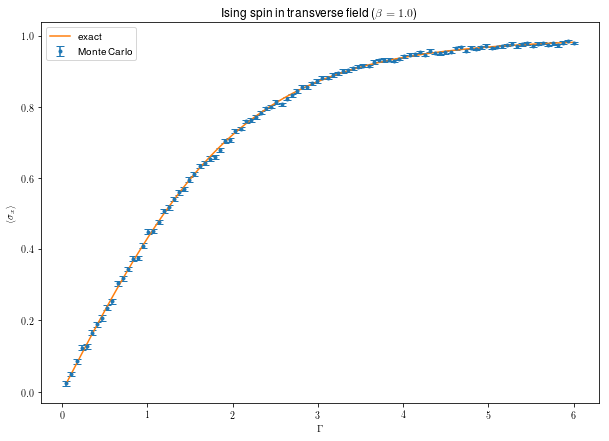

In [ ]:
# Visualize

plt.figure(figsize=(10, 7))
plt.errorbar(results[0],results[1],results[2],fmt='.',label='Monte Carlo', capsize=4)
plt.plot(results[0],sx(results[0],h,beta),label='exact')
plt.xlabel('$\\Gamma$')
plt.ylabel('$\\langle \\sigma_x \\rangle$')
plt.title('Ising spin in transverse field ($\\beta='+str(beta)+'$)')
plt.legend(loc='best')
plt.show()